<a href="https://colab.research.google.com/github/yogesh1000/SCARA/blob/master/bounding_boxes_training_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
# unzip to a local directory
import zipfile
local_zip = './train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./training')
zip_ref.close()

Saving train.zip to train.zip


In [ ]:
# uncomment the next line if you want to delete an existing models directory
!rm -rf ./models/

# clone the Tensorflow Model Garden
!git clone --depth 1 https://github.com/tensorflow/models/
# install the Object Detection API
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import zipfile
import io
import scipy.misc
import numpy as np

import glob
import imageio
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
### START CODE HERE (Replace Instances of `None` with your code) ###
%cd models/research/object_detection/
# import the label map utility module
from utils import label_map_util

# import module for reading and updating configuration files.
from utils import config_util

# import module for visualization. use the alias `viz_utils`
from utils import visualization_utils as viz_utils

# import module for building the detection model
from builders import model_builder
### END CODE HERE ###

# import module for utilities in Colab
from object_detection.utils import colab_utils
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path.

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    """Wrapper function to visualize detections.

    Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
          and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
          this function assumes that the boxes to be plotted are groundtruth
          boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
          category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
    """
    
    image_np_with_annotations = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.8)
    
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    
    else:

        plt.imshow(image_np_with_annotations)
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path.

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    """Wrapper function to visualize detections.

    Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
          and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
          this function assumes that the boxes to be plotted are groundtruth
          boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
          category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
    """
   
    image_np_with_annotations = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.8)
    
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    
    else:
        plt.imshow(image_np_with_annotations)


Cloning into 'models'...
remote: Enumerating objects: 2416, done.
remote: Counting objects: 100% (2416/2416), done.
remote: Compressing objects: 100% (2020/2020), done.
remote: Total 2416 (delta 575), reused 1376 (delta 368), pack-reused 0
Receiving objects: 100% (2416/2416), 30.79 MiB | 33.08 MiB/s, done.
Resolving deltas: 100% (575/575), done.
Processing /content/models/research
     |████████████████████████████████| 9.0MB 6.4MB/s 
     |████████████████████████████████| 358kB 45.0MB/s 
     |████████████████████████████████| 1.1MB 44.0MB/s 
     |████████████████████████████████| 2.2MB 45.5MB/s 
     |████████████████████████████████| 17.7MB 261kB/s 
     |████████████████████████████████| 829kB 52.9MB/s 
     |████████████████████████████████| 153kB 49.6MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 706kB 50.0MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |█

/content/training/1.jpg
/content/training/2.jpg
/content/training/3.jpg
/content/training/4.jpg
/content/training/5.jpg
/content/training/6.jpg
/content/training/7.jpg
/content/training/8.jpg
/content/training/9.jpg
/content/training/10.jpg


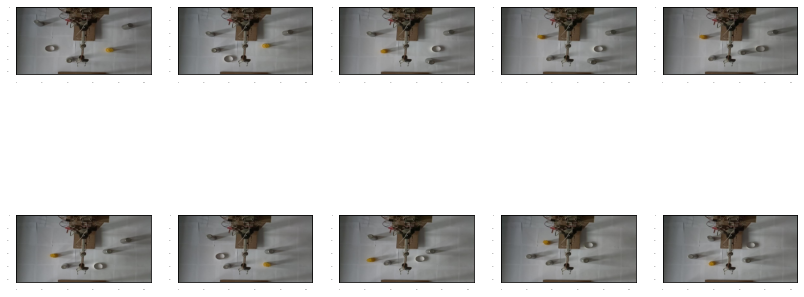

In [ ]:
%matplotlib inline

### START CODE HERE (Replace Instances of `None` with your code) ###

# assign the name (string) of the directory containing the training images
train_image_dir = './training'

# declare an empty list
train_images_np = []

# run a for loop for each image
for i in range(1, 11): # @REPLACE for i in range(None, None)

    # define the path (string) for each image
    image_path = os.path.join('/content/training/'+str(i)+'.jpg')
    print(image_path)

    # load images into numpy arrays and append to a list
    train_images_np.append(load_image_into_numpy_array(image_path))
### END CODE HERE ###

# configure plot settings via rcParams
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

# plot images
for idx, train_image_np in enumerate(train_images_np):
    plt.subplot(2,5 , idx+1)
    plt.imshow(train_image_np)

plt.show()

In [ ]:
# Option 1: draw your own ground truth boxes
# Define the list of ground truth boxes
gt_boxes = []
# annotate the training images
colab_utils.annotate(train_images_np, box_storage_pointer=gt_boxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [ ]:
gt_boxes


[array([[0.60866666, 0.67428571, 0.68866666, 0.72666667],
        [0.24366666, 0.82      , 0.32366666, 0.8752381 ],
        [0.19866666, 0.12285714, 0.26533333, 0.1752381 ],
        [0.75866666, 0.35904762, 0.84366666, 0.41714286],
        [0.56533333, 0.20952381, 0.677     , 0.29333333]]),
 array([[0.54533333, 0.63238095, 0.62033333, 0.6847619 ],
        [0.33033333, 0.8047619 , 0.42033333, 0.85428571],
        [0.36533333, 0.19333333, 0.44033333, 0.24666667],
        [0.61533333, 0.23714286, 0.69033333, 0.28857143],
        [0.71866666, 0.33619048, 0.83033333, 0.41428571]]),
 array([[0.62866666, 0.30095238, 0.70366666, 0.35238095],
        [0.337     , 0.80285714, 0.42366666, 0.85428571],
        [0.787     , 0.65619048, 0.872     , 0.71047619],
        [0.36533333, 0.19333333, 0.43866666, 0.24952381],
        [0.56866666, 0.68      , 0.687     , 0.76095238]]),
 array([[0.41533333, 0.26285714, 0.48866666, 0.3152381 ],
        [0.742     , 0.32571429, 0.817     , 0.37904762],
        